In [1]:
import os

import requests

url = "https://kshop-dev.oss-cn-beijing.aliyuncs.com/common/train.zip"
target_folder = "./data/train"

# 创建目标目录（如果不存在）
os.makedirs(target_folder, exist_ok=True)

# 下载zip文件
response = requests.get(url)
filename = os.path.join(target_folder, "train.zip")
with open(filename, "wb") as f:
    f.write(response.content)





In [2]:
import zipfile
import os

target_folder = "./data/train"

filename = os.path.join(target_folder, "train.zip")
# 解压zip文件并将图片文件保存到临时目录中
# 解压缩文件
with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall(target_folder)

In [3]:
import os, shutil

target_folder = "./data/train"

original_dataset_dir = os.path.join(target_folder, 'train')
base_dir = './data/cats_and_dogs_small/'

os.makedirs(base_dir, exist_ok=True)
train_dir = os.path.join(base_dir, 'train')
os.makedirs(train_dir, exist_ok=True)
validation_dir = os.path.join(base_dir, 'validation')
os.makedirs(validation_dir, exist_ok=True)
test_dir = os.path.join(base_dir, 'test')
os.makedirs(test_dir, exist_ok=True)
train_cats_dir = os.path.join(train_dir, 'cats')
os.makedirs(train_cats_dir, exist_ok=True)
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.makedirs(train_dogs_dir, exist_ok=True)
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.makedirs(validation_cats_dir, exist_ok=True)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.makedirs(validation_dogs_dir, exist_ok=True)
test_cats_dir = os.path.join(test_dir, 'cats')
os.makedirs(test_cats_dir, exist_ok=True)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.makedirs(test_dogs_dir, exist_ok=True)
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)
print('total training cat images', len(os.listdir(train_cats_dir)))
print('total training dog images', len(os.listdir(train_dogs_dir)))
print('total validation cat images', len(os.listdir(validation_cats_dir)))
print('total validation dog images', len(os.listdir(validation_dogs_dir)))
print('total test cat images', len(os.listdir(test_cats_dir)))
print('total test dog images', len(os.listdir(test_dogs_dir)))

total training cat images 1000
total training dog images 1000
total validation cat images 500
total validation dog images 500
total test cat images 500
total test dog images 500


In [4]:
from tensorflow import optimizers
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(learning_rate=1e-4), metrics=['acc'])

2023-04-28 06:50:26.280665: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-28 06:50:26.281747: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-28 06:50:26.299777: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-28 06:50:26.300065: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-28 06:50:26.653828: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

2023-04-28 06:50:26.982681: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-04-28 06:50:26.999543: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [5]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1. / 255)
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
# for data_batch, labels_batch in train_generator:
#     print('data batch shape:', data_batch.shape)
#     print('labels batch shape:', labels_batch.shape)

history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50)
model.save('cats_and_dogs_small_1.h5')

Epoch 1/30


/tmp/ipykernel_43114/1976077934.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,
2023-04-28 06:50:37.811543: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


100/100 [==============================] - ETA: 0s - loss: 0.6894 - acc: 0.5320

2023-04-28 06:50:45.849564: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


100/100 [==============================] - 9s 91ms/step - loss: 0.6894 - acc: 0.5320 - val_loss: 0.6765 - val_acc: 0.5950
Epoch 2/30
100/100 [==============================] - 9s 90ms/step - loss: 0.6698 - acc: 0.5895 - val_loss: 0.6611 - val_acc: 0.6120
Epoch 3/30
100/100 [==============================] - 9s 90ms/step - loss: 0.6519 - acc: 0.6050 - val_loss: 0.6746 - val_acc: 0.5730
Epoch 4/30
100/100 [==============================] - 9s 90ms/step - loss: 0.6235 - acc: 0.6395 - val_loss: 0.6475 - val_acc: 0.6070
Epoch 5/30
100/100 [==============================] - 9s 90ms/step - loss: 0.5851 - acc: 0.6830 - val_loss: 0.6075 - val_acc: 0.6590
Epoch 6/30
100/100 [==============================] - 9s 89ms/step - loss: 0.5575 - acc: 0.7090 - val_loss: 0.6090 - val_acc: 0.6530
Epoch 7/30
100/100 [==============================] - 9s 90ms/step - loss: 0.5325 - acc: 0.7310 - val_loss: 0.6009 - val_acc: 0.6730
Epoch 8/30
100/100 [==============================] - 9s 90ms/step - loss: 0.513

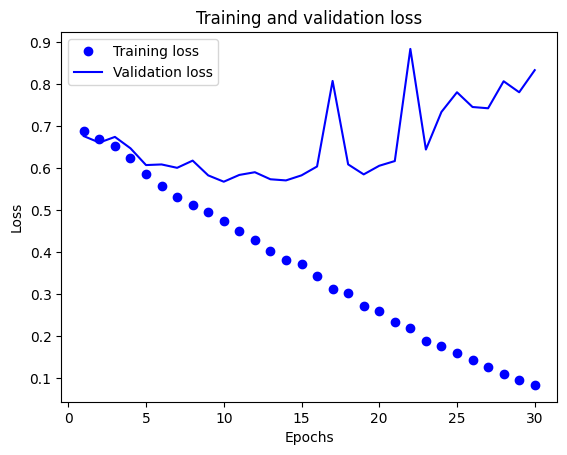

In [7]:
import matplotlib.pyplot as plt


def print_train_val_loss(history_dict):
    plt.clf()
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    epochs = range(1, len(loss_values) + 1)
    plt.plot(epochs, loss_values, 'bo', label='Training loss')
    plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


print_train_val_loss(history.history)


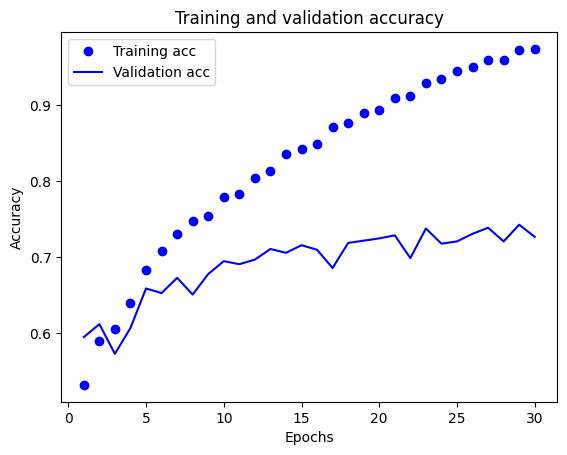

In [8]:
def print_train_val_acc(history_dict):
    plt.clf()
    acc = history_dict['acc']
    val_acc = history_dict['val_acc']
    epochs = range(1, len(val_acc) + 1)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()


print_train_val_acc(history.history)

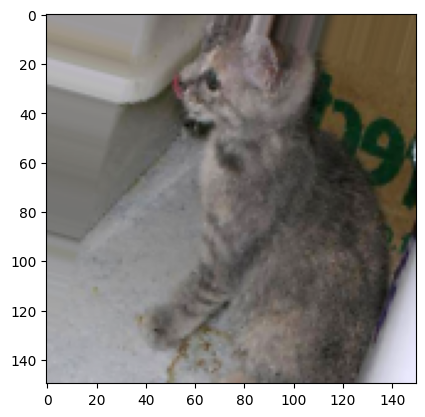

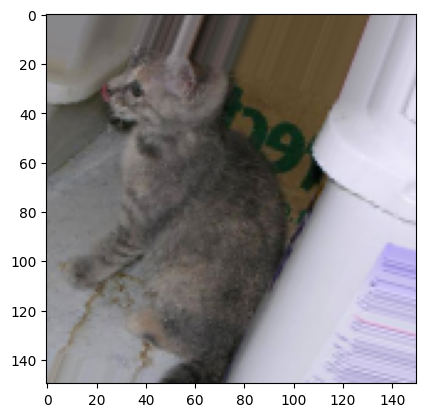

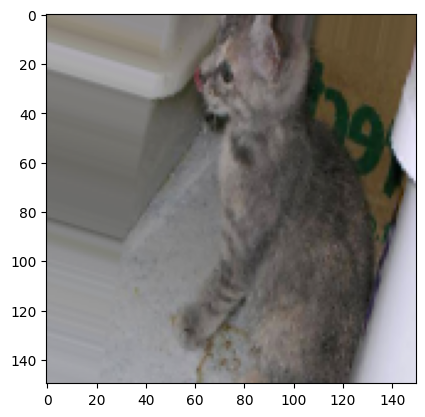

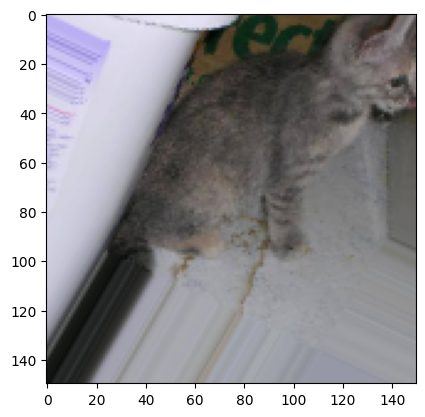

In [12]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

from tensorflow.keras import utils

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
# 选择一张图片
img_path = fnames[3]
img = utils.load_img(img_path, target_size=(150, 150))
# 转为向量, 形状为(150, 150, 3)
x = utils.img_to_array(img)
# 给单个数据增加一个批量的维度，形状改为(1,150,150,3)
x = x.reshape((1,) + x.shape)
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(utils.array_to_img(batch[0]))
    i = i + 1
    if i % 4 == 0:
        break

plt.show()



In [13]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(learning_rate=1e-4), metrics=['acc'])


In [14]:
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True, )

test_datagen = ImageDataGenerator(rescale=1. / 255)
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=100,
                              validation_data=validation_generator,
                              validation_steps=50)
model.save('cats_and_dogs_small_2.h5')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100


/tmp/ipykernel_43114/3846022959.py:19: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,
2023-04-28 06:58:27.081374: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


100/100 [==============================] - ETA: 0s - loss: 0.6944 - acc: 0.5030

2023-04-28 06:58:35.387044: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


100/100 [==============================] - 10s 92ms/step - loss: 0.6944 - acc: 0.5030 - val_loss: 0.6909 - val_acc: 0.5120
Epoch 2/100
100/100 [==============================] - 9s 92ms/step - loss: 0.6899 - acc: 0.5330 - val_loss: 0.6799 - val_acc: 0.5790
Epoch 3/100
100/100 [==============================] - 9s 93ms/step - loss: 0.6837 - acc: 0.5505 - val_loss: 0.6821 - val_acc: 0.5330
Epoch 4/100
100/100 [==============================] - 9s 92ms/step - loss: 0.6724 - acc: 0.5690 - val_loss: 0.6573 - val_acc: 0.5960
Epoch 5/100
100/100 [==============================] - 9s 94ms/step - loss: 0.6689 - acc: 0.6040 - val_loss: 0.6476 - val_acc: 0.6220
Epoch 6/100
100/100 [==============================] - 9s 93ms/step - loss: 0.6665 - acc: 0.5920 - val_loss: 0.6772 - val_acc: 0.5670
Epoch 7/100
100/100 [==============================] - 9s 93ms/step - loss: 0.6599 - acc: 0.6005 - val_loss: 0.7149 - val_acc: 0.5210
Epoch 8/100
100/100 [==============================] - 9s 93ms/step - los

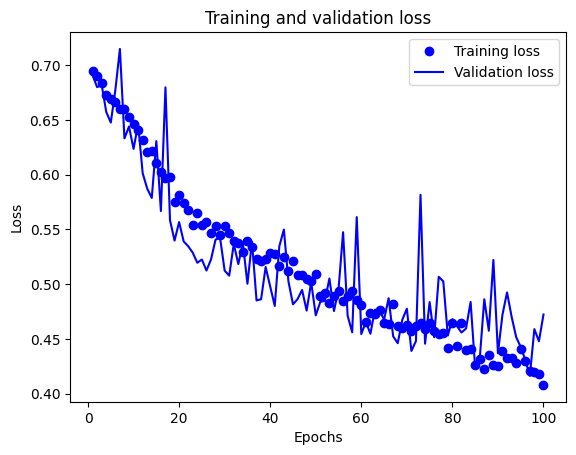

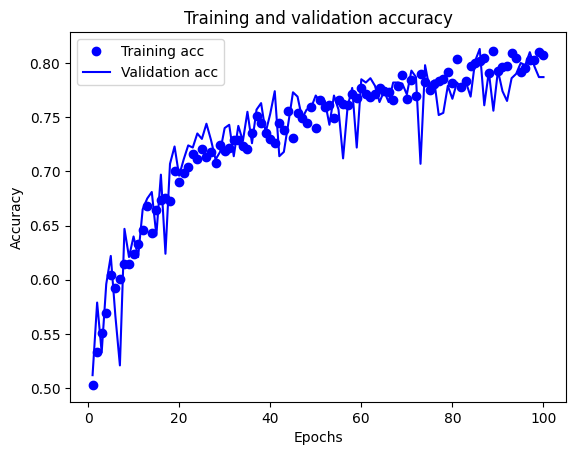

In [15]:
print_train_val_loss(history.history)
print_train_val_acc(history.history)
